In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import csv
import pandas as pd
from pandas.api.types import CategoricalDtype
import scipy as sp
from pathlib import Path
from tkinter import filedialog
import itertools
from colour import Color
from datetime import date
# import statsmodels.api as sm
# from statsmodels.stats.weightstats import ztest as ztest
from sklearn.metrics import r2_score as R2S
import cairo


## Names and Palette ##

In [2]:
today = date.today()
print("Today's date:", today)
date = str(today)
date

Today's date: 2024-05-22


'2024-05-22'

In [3]:
tubulin = '[Tubulin] (' r'$\mu$' 'M)'
tub = 'tub'

DCXconc = '[DCX] (nM)' 
EBconc = '[EB] (nM)'
DCX = 'DCX'
Type = 'DCX Type'

Concentration = 'Concentration (' r'$\mu$' 'M)'
Length = 'Length (' r'$\mu$' 'm)'
Lifetime = 'Lifetime (min)'
GrowthRate = 'Growth Rate (' r'$\mu$' 'm/min)'
TimeToNucleate = 'Time to Nucleate (min)'
ShrinkageLength = 'Shrink Length (' r'$\mu$' 'm)'
ShrinkageLifetime = 'Shrink Lifetime (min)'
ShrinkageRate = 'Shrink Rate (' r'$\mu$' 'm/min)'
RescuePerLength = 'Rescues (' r'$\mu$' 'm' r'$^{-1}$' ')'

In [4]:
black = '#000000'
grey = '#777777'
blue = '#23459C'
cyan = '#0089CF'
green = '#79BA1A'
purple = '#AB4A9C'
lily = '#CB81EA'
magenta = '#D80B8C'
red = '#e60000'
orange = '#FF7300'
darkorange = '#FF5B00'
lightorange = '#FFAC83'
yellow = '#FFCB05'
lightyellow = '#F9DC2D'
pink = '#FFA4CD'
StartHue1 = Color(purple)
DC1color = list(StartHue1.range_to(Color(pink),3))
StartHue2 = Color(darkorange)
DC2color = list(StartHue2.range_to(Color(lightorange),3))
print(DC1color,DC2color)

palette_all = [grey] + list(map(Color.get_hex,DC1color)) + list(map(Color.get_hex,DC2color)) + [green,cyan]

parameters = [GrowthRate,TimeToNucleate,Lifetime,ShrinkageRate]

[<Color #ab4a9c>, <Color #e468b8>, <Color #ffa4cd>] [<Color #ff5b00>, <Color #ff8341>, <Color #ffac83>]


In [5]:
### font for matplotlib
matplotlib.rcParams['font.family'] = 'Helvetica Neue LT Std'

## Join Data ##

In [261]:
askdirectory = filedialog.askdirectory() # show an "Open" dialog box and return the path to the selected file
path = Path(askdirectory)

In [262]:
folders = [x for x in path.iterdir() if x.is_dir()]
folders = [i for i in folders if str(i.stem)[-1] == 'M']
folders

[WindowsPath('D:/Sofia/2023_2summer-fall_DCXintensitydynmts/2023-11-01_nonSEC-dcxdynMut/CH1_typeR76S_DCX115nM'),
 WindowsPath('D:/Sofia/2023_2summer-fall_DCXintensitydynmts/2023-11-01_nonSEC-dcxdynMut/CH2_typeR76S_DCX60nM'),
 WindowsPath('D:/Sofia/2023_2summer-fall_DCXintensitydynmts/2023-11-01_nonSEC-dcxdynMut/CH3_typeR76S_DCX500nM'),
 WindowsPath('D:/Sofia/2023_2summer-fall_DCXintensitydynmts/2023-11-01_nonSEC-dcxdynMut/CH4_typeR76S_DCX80nM'),
 WindowsPath('D:/Sofia/2023_2summer-fall_DCXintensitydynmts/2023-11-01_nonSEC-dcxdynMut/CH6_typeR76S_DCX230nM')]

In [263]:
files = []
for k in folders:
    files0 = [x for x in k.iterdir() if x.is_file()]
    files0 = [i for i in files0 if str(i).rfind('Results_') != -1 if str(i).rfind('csv') != -1]
    files = files + files0
files

[WindowsPath('D:/Sofia/2023_2summer-fall_DCXintensitydynmts/2023-11-01_nonSEC-dcxdynMut/CH1_typeR76S_DCX115nM/Results_processed.csv'),
 WindowsPath('D:/Sofia/2023_2summer-fall_DCXintensitydynmts/2023-11-01_nonSEC-dcxdynMut/CH2_typeR76S_DCX60nM/Results_processed.csv'),
 WindowsPath('D:/Sofia/2023_2summer-fall_DCXintensitydynmts/2023-11-01_nonSEC-dcxdynMut/CH3_typeR76S_DCX500nM/Results_processed.csv'),
 WindowsPath('D:/Sofia/2023_2summer-fall_DCXintensitydynmts/2023-11-01_nonSEC-dcxdynMut/CH4_typeR76S_DCX80nM/Results_processed.csv'),
 WindowsPath('D:/Sofia/2023_2summer-fall_DCXintensitydynmts/2023-11-01_nonSEC-dcxdynMut/CH6_typeR76S_DCX230nM/Results_processed.csv')]

In [264]:
def findmetadata(tag,end,i):
    n = len(tag)
    locstart = str(i).rfind(tag) 
    locend = str(i).find(end, locstart)
    tag0 = str(i)[locstart+n: locend]
    
    return tag0

In [265]:
dates= []
CH= []
dcx = []
dcxtype= []
for i in files:
    dateloc = str(i).rfind("202")   
    dates0 = str(i)[dateloc : dateloc+10]
    dates = dates + [dates0]

    CH0 = findmetadata("CH",'_',i)
    CH = CH + [CH0]  
    
    type0 = findmetadata("type",'_',i)
    dcxtype = dcxtype + [type0] 
    
    dcx0 = findmetadata("DCX",'nM',i)
    dcx = dcx + [float(dcx0)] 

dates,CH,dcx, dcxtype

(['2023-11-01', '2023-11-01', '2023-11-01', '2023-11-01', '2023-11-01'],
 ['1', '2', '3', '4', '6'],
 [115.0, 60.0, 500.0, 80.0, 230.0],
 ['R76S', 'R76S', 'R76S', 'R76S', 'R76S'])

## Open Data ##

In [266]:
data = pd.DataFrame(columns=[] , index=[])

for i in np.arange(len(files)):
    data0 = pd.read_csv(files[i], encoding='utf-8',keep_default_na=False)

    
    data0['Date'] = dates[i]
    data0['CH'] = CH[i]
    data0[DCXconc] = dcx[i]
    data0['Type'] = dcxtype[i]
    
    data = pd.concat([data,data0], ignore_index=True)

data = data.rename(columns={"Mean": "Intensity"})
data = data.sort_values(by = DCXconc)
data

,,Area,Intensity,Min,Max,Angle,Length,Date,CH,[DCX] (nM),Type
32,16,328,1.418,0,4,100.620,65.115,2023-11-01,2,60.0,R76S
27,11,216,1.644,0,4,123.690,43.267,2023-11-01,2,60.0,R76S
26,10,88,1.750,0,4,-42.709,17.692,2023-11-01,2,60.0,R76S
25,9,270,1.881,0,5,33.690,54.083,2023-11-01,2,60.0,R76S
24,8,113,2.442,0,7,138.576,22.672,2023-11-01,2,60.0,R76S
...,...,...,...,...,...,...,...,...,...,...,...
40,6,68,102.426,46,180,-138.013,13.454,2023-11-01,3,500.0,R76S
41,7,64,107.375,52,166,-141.340,12.806,2023-11-01,3,500.0,R76S
42,8,80,181.588,103,283,-39.806,15.620,2023-11-01,3,500.0,R76S
44,10,128,141.422,72,225,13.496,25.710,2023-11-01,3,500.0,R76S


In [267]:
newdirectory = str(path.parents[0])+'//Intensity_Data_Sheets'
newmydir = Path(newdirectory)
newmydir.mkdir(exist_ok=True)
newmydir

WindowsPath('D:/Sofia/2023_2summer-fall_DCXintensitydynmts/Intensity_Data_Sheets')

In [268]:
name = dates[0]+'_Intensity_analysed-on_'+date +'.csv'
name

'2023-11-01_Intensity_analysed-on_2023-11-01.csv'

In [269]:
data.to_csv(path/(name), encoding='utf-8', index=False)
data.to_csv(newmydir/(name), encoding='utf-8', index=False)

## Open prev sevad data ##

In [6]:
askFitParam = filedialog.askopenfilename() # show an "Open" dialog box and return the path to the selected file
data = pd.read_csv(askFitParam, encoding='utf-8',keep_default_na=False)
data

,,Area,Intensity (a.u.),Min,Max,Angle,Length,Date,CH,[DCX] (nM),Type
0,8,130,15.946,3,29,-62.447,25.942,2023-10-04,8,30,WT
1,1,265,25.411,10,38,-88.919,53.009,2023-10-04,4,30,WT
2,2,112,23.259,9,38,144.162,22.204,2023-10-04,4,30,WT
3,4,143,20.867,5,33,36.469,28.601,2023-10-04,4,30,WT
4,5,240,22.913,2,38,153.435,44.721,2023-10-04,4,30,WT
...,...,...,...,...,...,...,...,...,...,...,...
483,18,128,69.617,38,108,-67.380,26.000,2023-10-16,4,500,WT
484,2,185,59.838,35,84,-90.000,37.000,2023-10-16,4,500,WT
485,1,378,58.413,27,80,69.887,75.611,2023-10-16,4,500,WT
486,9,301,52.718,28,79,79.439,60.017,2023-10-16,4,500,WT


In [7]:
newmydir = Path(askFitParam)
newmydir = newmydir.parent

In [8]:
newmydir

WindowsPath('C:/Users/sofia/OneDrive - McGill University/EJCB2023/Sofia_EJCB_Figs/Data/Intensity')

## Plot ##

In [9]:
grey00 = '#777777'
grey20 = '#C5C5C5'

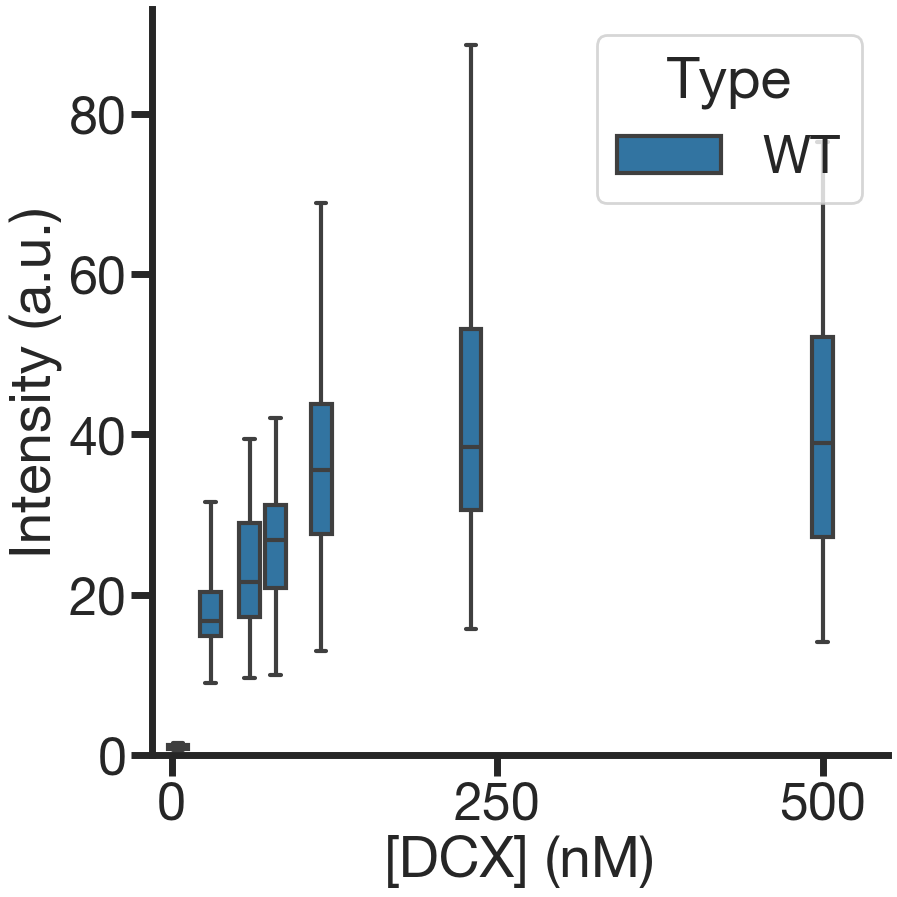

In [11]:
sns.set_style({'font.family':'Helvetica Neue LT Std', 'font.serif':'Helvetica Neue LT Std'})
fig, ax = plt.subplots(1,1,figsize=(10,10))

# ax = sns.boxplot(x= DCXconc, y='Mean', data=data, whis=np.inf,linewidth=3,native_scale=True)
# ax = sns.swarmplot(x=DCXconc, y='Mean', data=data, hue='Date', size=5,native_scale=True , palette = [grey00, grey20])


#ax = sns.swarmplot(x=DCXconc, y='Intensity (a.u.)', data=data, size=6,native_scale=True)
x0 = np.arange(0, 500, 1)
# ax.plot(x0, hillEQ(x0,p[0], np.exp(-p[1])), lw=3,ls= '-',alpha = 0.5, color = cyan)
# ax.plot(x0, hillEQ(x0,C1H, C2H), lw=3,ls= '-',alpha = 0.5, color = orange)
# ax.plot(x0, MMEQ(x0,C1M), lw=3,ls= '-',alpha = 0.5, color = pink)

# ax.legend(('Hill plot coeff', 'regular Hill','MM'),loc='lower right')

ax = sns.boxplot(x= DCXconc, y='Intensity (a.u.)', data=data,hue = 'Type', whis=np.inf,linewidth=3,native_scale=True)
#ax.legend('')
ax.set_xlabel(DCXconc)

ax.set_xlim(-15,550) 
ax.set_ylim(0,) 
ax.set_xticks(np.arange(0, 501, 250))
sns.set_style("ticks")
sns.despine()
ax.spines['left'].set_lw(5)
ax.spines['bottom'].set_lw(5)
ax.tick_params(axis='both', width = 5, length = 15)
sns.set_context("poster", font_scale=1.7, rc={"lines.linewidth":3.0})

plt.tight_layout()

#plt.savefig(newmydir/('intensity_'+date+'.pdf'))

In [18]:
datamedian = data.groupby(by=['Type',DCXconc])[["Intensity (a.u.)", DCXconc]].median()
datamean = data.groupby(by=['Type',DCXconc])[["Intensity (a.u.)", DCXconc]].mean()
datastd = data.groupby(by=['Type',DCXconc])[["Intensity (a.u.)", DCXconc]].std()

In [19]:
datamedian

Intensity (a.u.)  [DCX] (nM)
Type [DCX] (nM)                              
WT   5                     0.9200         5.0
     30                   16.7370        30.0
     60                   21.6180        60.0
     80                   26.7660        80.0
     115                  35.5890       115.0
     230                  38.4890       230.0
     500                  38.9835       500.0

In [20]:
datamean

Intensity (a.u.)  [DCX] (nM)
Type [DCX] (nM)                              
WT   5                   0.992615         5.0
     30                 17.765138        30.0
     60                 23.234559        60.0
     80                 26.608397        80.0
     115                36.465775       115.0
     230                42.496069       230.0
     500                39.874810       500.0

In [21]:
data.groupby(by=['Type',DCXconc])[["Intensity (a.u.)", DCXconc]].count()

Intensity (a.u.)  [DCX] (nM)
Type [DCX] (nM)                              
WT   5                         13          13
     30                        65          65
     60                        59          59
     80                        73          73
     115                       89          89
     230                      131         131
     500                       58          58

In [22]:
datamean[DCXconc]['WT']

[DCX] (nM)
5        5.0
30      30.0
60      60.0
80      80.0
115    115.0
230    230.0
500    500.0
Name: [DCX] (nM), dtype: float64

### fIT WITH EQS###

In [106]:
x = datamean[DCXconc]['WT'].values
y = datamean['Intensity (a.u.)']['WT'].values
yerr = datastd['Intensity (a.u.)']['WT'].values

In [183]:
def hillEQ_norm(x, n, kd):
    return  (y[-1]- y[0]) * np.power(x, n)/(kd + np.power(x, n))

def hillEQ(x, n, kd, sat):
    return  sat * np.power(x, n)/(kd + np.power(x, n))

def hillEQ3(x, kd,sat):
    return  sat * np.power(x, 3)/(kd + np.power(x,3))

def MMEQ(x, kd,sat):
    return  sat * np.power(x, 1)/(kd + np.power(x,1))

In [184]:
coeffH, var_matrixH = sp.optimize.curve_fit(hillEQ,x,y,sigma = yerr)

varianceH = np.diagonal(var_matrixH) #Refer [3]
SEH = np.sqrt(varianceH)

coeffH,SEH

(array([  1.82054208, 665.40697979,  37.00600805]),
 array([1.60770217e-01, 1.94924332e+02, 4.41626707e+00]))

In [185]:
coeffMn, var_matrixM = sp.optimize.curve_fit(MMEQ,x,y,sigma = yerr)

varianceM = np.diagonal(var_matrixM) #Refer [3]
SEMn = np.sqrt(varianceM)

coeffMn,SEMn

(array([299.37560971,  86.7560288 ]), array([248.17856057,  58.44280384]))

In [186]:
coeffMn3, var_matrixM = sp.optimize.curve_fit(hillEQ3,x,y,sigma = yerr)

varianceM = np.diagonal(var_matrixM) #Refer [3]
SEMn3 = np.sqrt(varianceM)

coeffMn3,SEMn3

(array([3239.55434949,   25.38527137]), array([1023.38635458,    3.24518846]))

### Fit with hill plot ###

In [191]:
logx = np.log(x[0:-2])
normy =( y)/(y[-1])
logy = np.log(normy[0:-2]/(1-normy[0:-2]))



In [158]:
x,y,yerr

(array([  5.,  30.,  60.,  80., 115., 230., 500.]),
 array([ 0.99261538, 17.76513846, 23.23455932, 26.60839726, 36.46577528,
        42.4960687 , 39.87481034]),
 array([ 0.27976167,  4.55995503,  8.04855477,  7.43265278, 12.91246145,
        16.15575718, 15.96253172]))

In [190]:
normyerr = np.sqrt(  np.square( yerr )/np.square( y[-1] ) + np.square( y )* np.square( yerr[-1] ) /np.power( y[-1],4 ) )
normyerr

array([0.01218726, 0.21186363, 0.30846643, 0.32573528, 0.48875948,
       0.58836295, 0.56613257])

In [198]:
logyerrR = np.sqrt( np.square(normyerr) / (  np.square( normy-1 ) *np.square( normy ) ) )
logyerrR = logyerrR[0:-2]
logyerrR

C:\Users\sofia\AppData\Local\Temp\ipykernel_27888\232344730.py:1: RuntimeWarning: divide by zero encountered in divide
  logyerrR = np.sqrt( np.square(normyerr) / (  np.square( normy-1 ) *np.square( normy ) ) )


array([0.50207831, 0.85763553, 1.26855955, 1.46720171, 6.25137477])

In [199]:
def linfit(x,m,b):
    return m*x + b

In [200]:
p, cov = sp.optimize.curve_fit(linfit,logx,logy,sigma = logyerrR)
var = np.diagonal(cov) #Refer [3]
SElin = np.sqrt(var) #Refer [4]

mL,bL = p


p, SElin

(array([ 1.70322894, -6.37061739]), array([0.1168026 , 0.31193162]))

In [201]:
R2S(logy,logx*mL+bL)

0.9596077314626991

In [202]:
def K_A(p):
    return np.exp(-p[1]/p[0]) , np.exp(-p[1]/p[0])/p[0]*np.sqrt(np.square(SElin[1])+np.square(p[1]*SElin[0]/p[0]))

In [203]:
K_A(p)

(42.111367958236876, 13.27231011608825)

In [131]:
R2S(logy,np.multiply(logx,m)+b)

0.9613555748863942

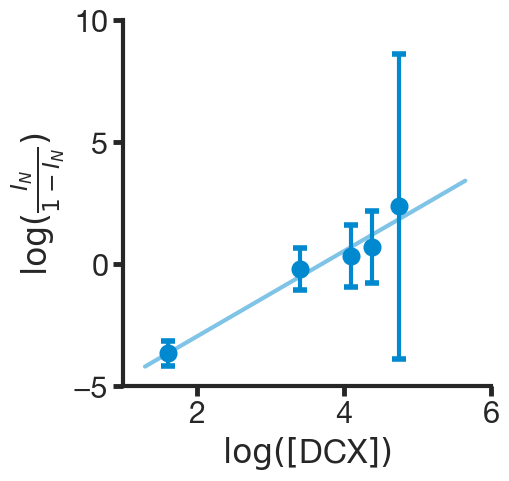

In [216]:
scattersize = 9
cap = 5
sns.set_style({'font.family':'Helvetica Neue LT Std', 'font.serif':'Helvetica Neue LT Std'})
fig, ax = plt.subplots(1,1,figsize=(4.75,4.75))
ax.errorbar(logx , logy , yerr= logyerrR , fmt='',marker='o', markersize=scattersize,capsize = cap,
                              markeredgewidth=4, alpha = 1, ls='', color = cyan)

x0 = np.arange(1.3, 5.7, 0.05)
ax.plot(x0, x0*m+b, lw=3,ls= '-',alpha = 0.5, color = cyan)

ax.set_ylim(-5,10)
ax.set_xlim(1,6)
ax.set_xlabel(r'$\log([$''DCX' r'$])$')
#ax.set_xticks(np.arange(0, 22.1, 2))
ax.set_yticks(np.arange(-5, 10+0.1, 5))
ax.set_ylabel(r'$\log(\frac{I_N}{1-I_N})$') 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_lw(3)
ax.spines['bottom'].set_lw(3)
ax.tick_params(axis='both', width = 3.5, length = 7)

#ax.legend((r'$n=2.94 \pm 0.49$' '\n' r'$R^2 > 0.945$',),loc='lower right',title='Hill Equation')

sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})

plt.savefig(newmydir/('logexpHillfit_Intensity_'+date+'.pdf'), bbox_inches = 'tight')

### plot ###

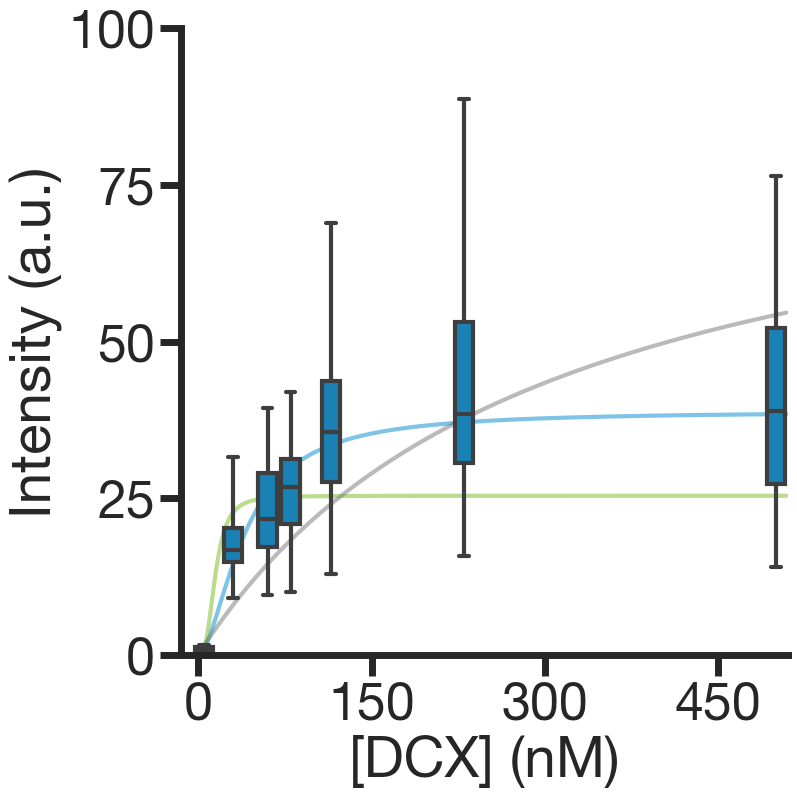

In [187]:
sns.set_style({'font.family':'Helvetica Neue LT Std', 'font.serif':'Helvetica Neue LT Std'})
fig, ax = plt.subplots(1,1,figsize=(9,9))

xmax = 510

x0 = np.arange(0, xmax, 1)
ax.plot(x0, hillEQ_norm(x0,p[0], np.exp(-p[1])), lw=3,ls= '-',alpha = 0.5, color = cyan)
# ax.plot(x0, hillEQ(x0,coeffH[0], coeffH[1],coeffH[2]), lw=3,ls= '-',alpha = 0.5, color = orange)
ax.plot(x0, hillEQ3(x0,coeffMn3[0],coeffMn3[1]), lw=3,ls= '-',alpha = 0.5, color = green)
ax.plot(x0, MMEQ(x0,coeffMn[0],coeffMn[1]), lw=3,ls= '-',alpha = 0.5, color = grey)

# ax.legend(('Hill plot coeff', 'regular Hill','MM'),loc='lower right')

ax = sns.boxplot(x= DCXconc, y='Intensity (a.u.)', data=data, color = cyan, whis=np.inf,linewidth=3,native_scale=True,legend = False)
#ax.legend('')
ax.set_xlabel(DCXconc)

ax.set_xlim(-15,xmax) 
ax.set_ylim(0,100) 
ax.set_xticks(np.arange(0, xmax+1, 150))
ax.set_yticks(np.arange(0, 101, 25))
sns.set_style("ticks")
sns.despine()
ax.spines['left'].set_lw(5)
ax.spines['bottom'].set_lw(5)
ax.tick_params(axis='both', width = 5, length = 15)
sns.set_context("poster", font_scale=1.7, rc={"lines.linewidth":3.0})

plt.tight_layout()

plt.savefig(newmydir/('intensity1_'+date+'.pdf'))

C:\Users\sofia\AppData\Local\Temp\ipykernel_27888\2747995592.py:2: RuntimeWarning: invalid value encountered in power
  return  (y[-1]- y[0]) * np.power(x, n)/(kd + np.power(x, n))


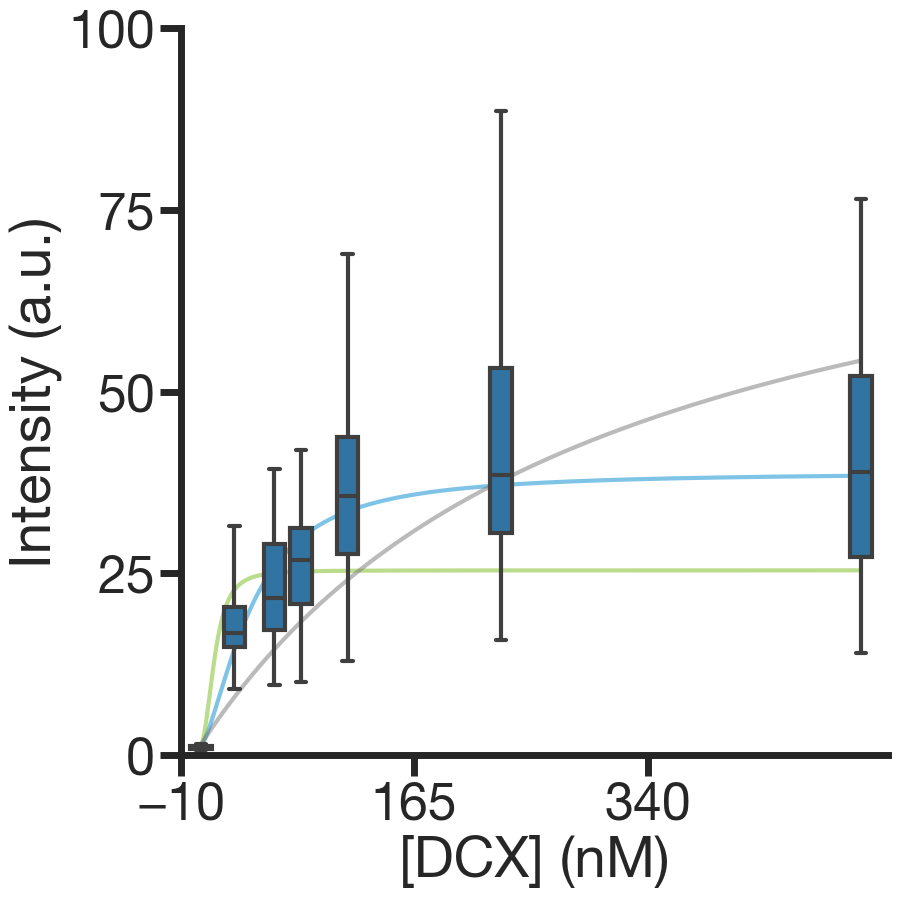

In [176]:
sns.set_style({'font.family':'Helvetica Neue LT Std', 'font.serif':'Helvetica Neue LT Std'})
fig, ax = plt.subplots(1,1,figsize=(10,10))


x0 = np.arange(500-xmax, 500, 1)
ax.plot(x0, hillEQ_norm(x0,p[0], np.exp(-p[1])), lw=3,ls= '-',alpha = 0.5, color = cyan)
# ax.plot(x0, hillEQ(x0,coeffH[0], coeffH[1],coeffH[2]), lw=3,ls= '-',alpha = 0.5, color = orange)
ax.plot(x0, hillEQ3(x0,coeffMn3[0],coeffMn3[1]), lw=3,ls= '-',alpha = 0.5, color = green)
ax.plot(x0, MMEQ(x0,coeffMn[0],coeffMn[1]), lw=3,ls= '-',alpha = 0.5, color = grey)

# ax.legend(('Hill plot coeff', 'regular Hill','MM'),loc='lower right')

ax = sns.boxplot(x= DCXconc, y='Intensity (a.u.)', data=data,hue = 'Type', whis=np.inf,linewidth=3,native_scale=True,legend = False)
#ax.legend('')
ax.set_xlabel(DCXconc)

ax.set_xlim(500-xmax,520) 
ax.set_ylim(0,100) 
ax.set_xticks(np.arange(500-xmax, 501, 175))
ax.set_yticks(np.arange(0, 101, 25))
sns.set_style("ticks")
sns.despine()
ax.spines['left'].set_lw(5)
ax.spines['bottom'].set_lw(5)
ax.tick_params(axis='both', width = 5, length = 15)
sns.set_context("poster", font_scale=1.7, rc={"lines.linewidth":3.0})

plt.tight_layout()

plt.savefig(newmydir/('intensity2_'+date+'.pdf'))

In [153]:
def reduced_chi_squared(obs,fit,sigma,obsN,paramN): 
    freedom = obsN-paramN

    return np.sum(np.square(fit - obs)/np.square(sigma)), np.sum(np.square(fit - obs)/np.square(sigma)) / freedom

In [154]:
reduced_chi_squared(y,hillEQ_norm(x,p[0], np.exp(-p[1])),yerr,len(y),2)

(1.0078662215129326, 0.20157324430258652)

In [155]:
reduced_chi_squared(y,hillEQ3(x,coeffMn3[0],coeffMn3[1]),yerr,len(y),2)

(15.830722556666144, 3.1661445113332287)

In [156]:
reduced_chi_squared(y,MMEQ(x,coeffMn[0],coeffMn[1]),yerr,len(y),2)

(119.44228083728869, 23.88845616745774)

In [168]:
def get_chi2(x,y,yerr,n):
    
    def hillEQ_fix_n(x, kd, sat):
    return  sat * np.power(x, n)/(kd + np.power(x, n))
    
    coeff, var_matrix = sp.optimize.curve_fit(hillEQ_fix_n,x,y)
    
    # chi2, red_chi2 = reduced_chi_squared(y,hillEQ_norm(x,p[0], np.exp(-p[1])),yerr,len(y),2)
    return coeff

In [169]:
get_chi2(x,y,yerr,3)
    



array([54.50683031, 48.14978069])